In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import UN Mortality Data
mortality_url = 'UN_MortalityData.csv'
mortality = pd.read_csv(mortality_url,\
                        skiprows = 1,\
                        encoding = 'ISO-8859-1')

In [3]:
mortality.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Population annual rate of increase (percent),1.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2005,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,"Infant mortality for both sexes (per 1,000 liv...",49.1,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2005,"Maternal mortality ratio (deaths per 100,000 p...",288,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2005,Life expectancy at birth for both sexes (years),67.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


It looks like there are two colums associated with Region/Country/Area, a Code and a Name. <br> Let's rename those columns.

In [4]:
# Rename columns
new_columns_map = dict(zip(mortality.columns,\
                           ['RegionCode', 'RegionName',\
                            'Year', 'Series', 'Value',\
                            'Footnotes', 'Source']))
mortality.rename(columns = new_columns_map, inplace = True)

In [5]:
mortality.groupby('Year').count()

,RegionCode,RegionName,Series,Value,Footnotes,Source
Year,,,,,,
2000,15,15,15,15,4,15
2001,8,8,8,8,0,8
2002,3,3,3,3,0,3
2003,2,2,2,2,0,2
2004,11,11,11,11,3,11
2005,1618,1618,1618,1618,1422,1618
2006,9,9,9,9,2,9
2007,4,4,4,4,3,4
2008,6,6,6,6,1,6


It also looks like the vast majority of the countries reporting only do so every 5 years. <br>
I will just take those data to paint broader strokes.

In [6]:
mortalityTrends  = mortality.loc[(mortality.Year == 2005 ) | (mortality.Year == 2010) | (mortality.Year == 2015)]

I want to plot global trends over this 15 year time span. <br> 
Looks like there is conveniently an instance of RegionName that are the Total Global values.

In [7]:
global_mortality_trends = mortalityTrends[mortalityTrends['RegionName']\
                                          == 'Total, all countries or areas']

What kind of data do we have available?

In [8]:
global_mortality_trends.Series.value_counts()

Life expectancy at birth for males (years)                  3
Infant mortality for both sexes (per 1,000 live births)     3
Maternal mortality ratio (deaths per 100,000 population)    3
Life expectancy at birth for females (years)                3
Total fertility rate (children per women)                   3
Life expectancy at birth for both sexes (years)             3
Population annual rate of increase (percent)                3
Name: Series, dtype: int64

In [9]:
infant_years = global_mortality_trends.Year.loc[global_mortality_trends.Series\
                            == 'Infant mortality for both sexes (per 1,000 live births)']
infant_values = global_mortality_trends.Value.loc[global_mortality_trends.Series\
                            == 'Infant mortality for both sexes (per 1,000 live births)']
print(infant_years)
print(infant_values)

2     2005
9     2010
16    2015
Name: Year, dtype: int64
2     49.1
9     41.3
16      35
Name: Value, dtype: object


Okay, looks like "Values" is not numeric. We need to change these element by element.

In [10]:
infant_values = infant_values.map(float)

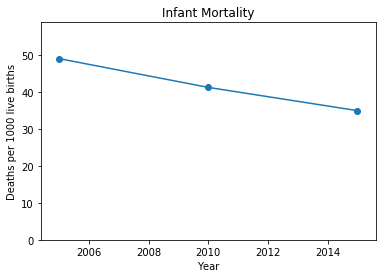

In [11]:
fig = plt.subplot()

plt.plot(infant_years, infant_values)
plt.scatter(infant_years, infant_values)
plt.title('Infant Mortality')
plt.xlabel('Year')
plt.ylabel('Deaths per 1000 live births')
plt.ylim((0,max(infant_values)*1.2))
plt.show()

Let's look at maternal mortality too.

In [12]:
maternal_years = global_mortality_trends.Year.loc[global_mortality_trends.Series\
                            == 'Maternal mortality ratio (deaths per 100,000 population)']
maternal_values = global_mortality_trends.Value.loc[global_mortality_trends.Series\
                            == 'Maternal mortality ratio (deaths per 100,000 population)']
maternal_values = maternal_values.map(float)

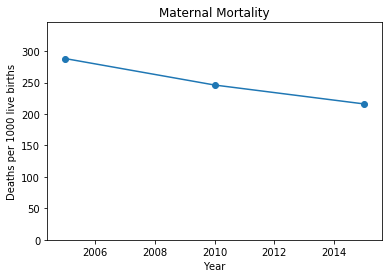

In [13]:
fig = plt.subplot()

plt.plot(maternal_years, maternal_values)
plt.scatter(maternal_years, maternal_values)
plt.title('Maternal Mortality')
plt.xlabel('Year')
plt.ylabel('Deaths per 1000 live births')
plt.ylim((0,max(maternal_values)*1.2))
plt.show()